In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from datetime import datetime
import time


%matplotlib inline
plt.style.use('fivethirtyeight')

    4.Define the necessary steps to demonstrate or not your hypothesis.
    5. With the code structure defined and using Python:
    a. Get your data. Maybe you need to use an API, maybe a file. Data Wrangling.
    b. Clean your data. Detect outliers, rare values and reemplace NaN values if
    needs.
    c. Draw all graphs you need both to understand your data and to show the
    necessary results.
    d. Create an API that returns the explained in the Requirements section.
    Maybe you find useful doing more than one endpoint.
    e. Explain why from your graphs and others results it can be argued the
    conclusion.

Now that we have the dataset with the information of only the necessary countries. We will further clean the data with by looking at the following things:

1.Check the types of the columns and changing the date column to a datetime64 type and setting it as our index.

2.Checking the data for any Nan values.

3.Checking for duplicates in the data.

4.Dropping irrelevant columns

First we will start checking the types and specifcally the type of the date column.

In [114]:
df_20 = pd.read_csv('agencia_empleo_inscritos_2020.csv', sep=";")
df_20

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-20,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,ene-20,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,ene-20,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,ene-20,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
...,...,...,...,...,...,...,...,...,...,...,...
5872,jun-20,Mujer,Otro Municipio,Entre 46 y 55 años,Española,2625.0,Especialistas en formación de personal,3621.0,Profesionales de apoyo de la Administración Pú...,3613.0,Asistentes de dirección y administrativos
5873,jun-20,Mujer,Otro Municipio,Entre 36 y 45 años,Española,4309.0,Empleados administrativos sin tareas de atenci...,4301.0,Grabadores de datos,2912.0,"Bibliotecarios, documentalistas y afines"
5874,jun-20,Hombre,Otro Municipio,Entre 46 y 55 años,Española,2230.0,Profesores de enseñanza secundaria (excepto ma...,2311.0,Profesores de educación especial,2220.0,Profesores de formación profesional (materias ...
5875,jun-20,Mujer,Centro,Entre 46 y 55 años,Española,3532.0,Organizadores de conferencias y eventos,2652.0,Profesionales de relaciones públicas,3613.0,Asistentes de dirección y administrativos


1. Clean Dataset

In [313]:
df_20.describe

<bound method NDFrame.describe of                       Género            Distrito      Tramos de Edad  \
Fecha de Inscripción                                                   
2020-01-01            Hombre  Puente De Vallecas  Entre 26 y 35 años   
2020-01-01            Hombre           Vicálvaro  Entre 26 y 35 años   
2020-01-01            Hombre      Otro Municipio    Menor de 25 años   
2020-01-01             Mujer       Ciudad Lineal  Entre 56 y 65 años   
2020-01-01            Hombre          Arganzuela  Entre 46 y 55 años   
...                      ...                 ...                 ...   
2020-06-01             Mujer      Otro Municipio  Entre 46 y 55 años   
2020-06-01             Mujer      Otro Municipio  Entre 36 y 45 años   
2020-06-01            Hombre      Otro Municipio  Entre 46 y 55 años   
2020-06-01             Mujer              Centro  Entre 46 y 55 años   
2020-06-01             Mujer       Ciudad Lineal  Entre 36 y 45 años   

                          Nac

In [315]:
df_20.describe(include="all")

,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
count,5877,5877,5877,5877,5640.000000,5640,4466.000000,4466,3585.000000,3585
unique,2,22,6,3,NaN,286,NaN,268,NaN,239
top,Mujer,Otro Municipio,Entre 36 y 45 años,Española,NaN,Asistentes de dirección y administrativos,NaN,"Personal de limpieza de oficinas, hoteles y ot...",NaN,"Personal de limpieza de oficinas, hoteles y ot..."
freq,3779,887,1527,3916,NaN,560,NaN,344,NaN,271
mean,NaN,NaN,NaN,NaN,5850.994681,NaN,6160.108598,NaN,6279.723291,NaN
std,NaN,NaN,NaN,NaN,2424.469643,NaN,2430.229957,NaN,2419.484210,NaN
min,NaN,NaN,NaN,NaN,1120.000000,NaN,1211.000000,NaN,1113.000000,NaN
25%,NaN,NaN,NaN,NaN,3613.000000,NaN,4412.000000,NaN,4412.000000,NaN
50%,NaN,NaN,NaN,NaN,5220.000000,NaN,5500.000000,NaN,5612.000000,NaN
75%,NaN,NaN,NaN,NaN,8412.000000,NaN,9210.000000,NaN,9210.000000,NaN


Preview of data with invalid values:


,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
7,ene-20,Hombre,Hortaleza,Menor de 25 años,Española,NaN,NaN,NaN,NaN,NaN,NaN
11,ene-20,Mujer,Vicálvaro,Entre 26 y 35 años,Comunitaria,2463.0,Ingenieros técnicos mecánicos,NaN,NaN,NaN,NaN


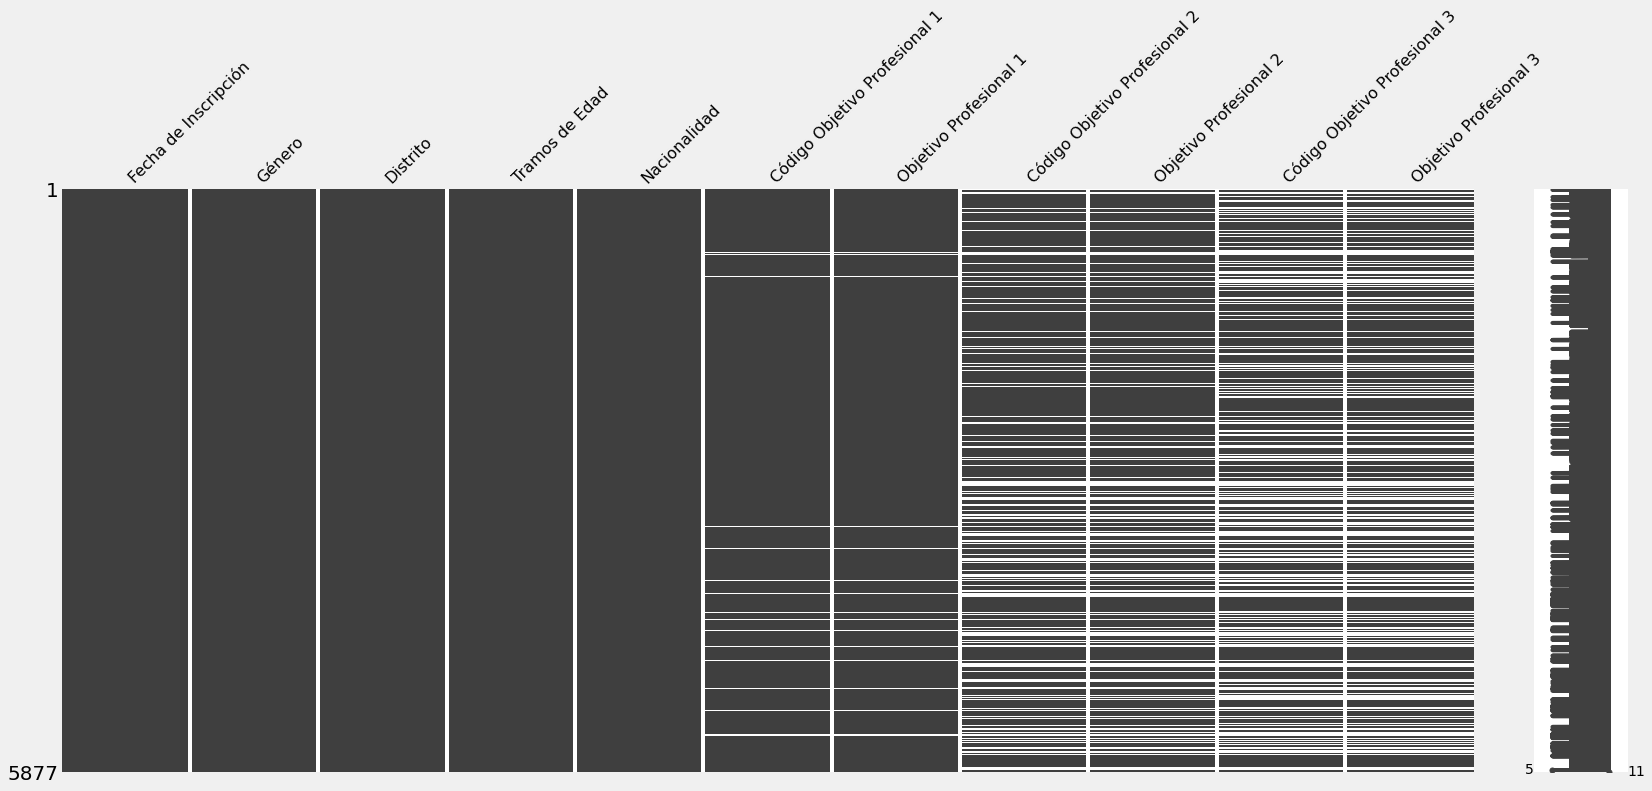

In [115]:
if len(df_20[df_20.isnull().any(axis=1)] != 0):
    print("Preview of data with invalid values:")
    display(df_20[df_20.isnull().any(axis=1)].head(3))
    missingno.matrix(df_20)
    plt.show()

In [116]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Fecha de Inscripción           5877 non-null   object 
 1   Género                         5877 non-null   object 
 2   Distrito                       5877 non-null   object 
 3   Tramos de Edad                 5877 non-null   object 
 4   Nacionalidad                   5877 non-null   object 
 5   Código Objetivo Profesional 1  5640 non-null   float64
 6   Objetivo Profesional 1         5640 non-null   object 
 7   Código Objetivo Profesional 2  4466 non-null   float64
 8   Objetivo Profesional 2         4466 non-null   object 
 9   Código Objetivo Profesional 3  3585 non-null   float64
 10  Objetivo Profesional 3         3585 non-null   object 
dtypes: float64(3), object(8)
memory usage: 321.5+ KB


In [117]:
 df =df_20
 dfX=pd.DataFrame()
 dfX["nulos"] = df.isnull().sum()
 dfX["total"] = df.count()
 dfX["porcentaje_nulos"] = dfX["nulos"] /  dfX["total"] 
 dfX

,nulos,total,porcentaje_nulos
Fecha de Inscripción,0,5877,0.000000
Género,0,5877,0.000000
Distrito,0,5877,0.000000
Tramos de Edad,0,5877,0.000000
Nacionalidad,0,5877,0.000000
Código Objetivo Profesional 1,237,5640,0.042021
Objetivo Profesional 1,237,5640,0.042021
Código Objetivo Profesional 2,1411,4466,0.315943
Objetivo Profesional 2,1411,4466,0.315943
Código Objetivo Profesional 3,2292,3585,0.639331


In [118]:
columns_to_drop_na= [c for c in df.columns if "Objetivo" in c]
print(f"Eliminaremos los datos que tengan valores inválidos para TODAS las columnas:\n{columns_to_drop_na}")


print(f"Antes de eliminar inválidos: {len(df_20)}")
resultado = df_20.dropna(subset=columns_to_drop_na, how='all')


print(f"Resultados inválidos: {len(df_20)-len(resultado)}")
resultado

Eliminaremos los datos que tengan valores inválidos para TODAS las columnas:
['Código Objetivo Profesional 1', 'Objetivo Profesional 1', 'Código Objetivo Profesional 2', 'Objetivo Profesional 2', 'Código Objetivo Profesional 3', 'Objetivo Profesional 3']
Antes de eliminar inválidos: 5877
Resultados inválidos: 237


,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-20,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,ene-20,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,ene-20,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,ene-20,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
...,...,...,...,...,...,...,...,...,...,...,...
5872,jun-20,Mujer,Otro Municipio,Entre 46 y 55 años,Española,2625.0,Especialistas en formación de personal,3621.0,Profesionales de apoyo de la Administración Pú...,3613.0,Asistentes de dirección y administrativos
5873,jun-20,Mujer,Otro Municipio,Entre 36 y 45 años,Española,4309.0,Empleados administrativos sin tareas de atenci...,4301.0,Grabadores de datos,2912.0,"Bibliotecarios, documentalistas y afines"
5874,jun-20,Hombre,Otro Municipio,Entre 46 y 55 años,Española,2230.0,Profesores de enseñanza secundaria (excepto ma...,2311.0,Profesores de educación especial,2220.0,Profesores de formación profesional (materias ...
5875,jun-20,Mujer,Centro,Entre 46 y 55 años,Española,3532.0,Organizadores de conferencias y eventos,2652.0,Profesionales de relaciones públicas,3613.0,Asistentes de dirección y administrativos


In [119]:
#Removing rows with only NaN values.
df_20.dropna(axis=0, how="all", inplace=True)
df_20.head(10)

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-20,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,ene-20,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,ene-20,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,ene-20,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,ene-20,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
5,ene-20,Mujer,Puente De Vallecas,Entre 56 y 65 años,Española,5833.0,Conserjes de edificios,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",9310.0,Ayudantes de cocina
6,ene-20,Mujer,Villaverde,Menor de 25 años,Extracomunitaria,5722.0,Cuidadores de niños en domicilios,9820.0,Reponedores,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
7,ene-20,Hombre,Hortaleza,Menor de 25 años,Española,NaN,NaN,NaN,NaN,NaN,NaN
8,ene-20,Hombre,Latina,Entre 46 y 55 años,Española,9431.0,Ordenanzas,5942.0,Auxiliares de vigilante de seguridad y similar...,4424.0,Teleoperadores
9,ene-20,Mujer,Puente De Vallecas,Entre 26 y 35 años,Extracomunitaria,9100.0,Empleados domésticos,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",9820.0,Reponedores


In [120]:
def fecha_sp_a_en(fecha):
    diccionario ={"ene":"jan" ,
    "feb":"feb" ,
    "mar":"mar" ,
    "abr":"apr" ,
    "may":"may" ,
    "jun":"jun" ,
    "jul":"jul" ,
    "ago":"aug" ,
    "sep":"sep" ,
    "oct":"oct" ,
    "nov":"nov" ,
    "dic":"dec" }
    try:
        #Los tres primeros caracteres son del mes. Ejemplo: fecha: ene-20 = mes:"ene"
        mes = fecha[0:3].lower()
        #Traducimos el mes a inglés
        mes_en_ingles = diccionario[mes]
        return mes_en_ingles + fecha[3:] # Nos quedamos con lo que hay a la derecha del mes  fecha: ene-20 =>"-20"
    except:
        return fecha
#Hacemos una prueba
original = pd.DataFrame(["jan-20", "ene-20", np.nan])[0]
t=original.apply(fecha_sp_a_en)

v= pd.to_datetime(t, format="%b-%y")


print(original)
print("="*20)
print(t)
print("="*20)
print(v)
print("="*20)
print(v.dt.strftime("%m___%Y"))

0    jan-20
1    ene-20
2       NaN
Name: 0, dtype: object
0    jan-20
1    jan-20
2       NaN
Name: 0, dtype: object
0   2020-01-01
1   2020-01-01
2          NaT
Name: 0, dtype: datetime64[ns]
0    01___2020
1    01___2020
2          NaN
Name: 0, dtype: object


In [121]:
def fecha_sp_a_en(fecha):
    diccionario ={"ene":"jan" ,
    "feb":"feb" ,
    "mar":"mar" ,
    "abr":"apr" ,
    "may":"may" ,
    "jun":"jun" ,
    "jul":"jul" ,
    "ago":"aug" ,
    "sep":"sep" ,
    "oct":"oct" ,
    "nov":"nov" ,
    "dic":"dec" }
    try:
        #Los tres primeros caracteres son del mes. Ejemplo: fecha: ene-20 = mes:"ene"
        mes = fecha[0:3].lower()
        #Traducimos el mes a inglés
        mes_en_ingles = diccionario[mes]
        return mes_en_ingles + fecha[3:] # Nos quedamos con lo que hay a la derecha del mes  fecha: ene-20 =>"-20"
    except:
        return fecha
      
       
        #Hacemos una prueba
original = df_20["Fecha de Inscripción"]
t=original.apply(fecha_sp_a_en)

v= pd.to_datetime(t, format="%b-%y")


print(original)
print("="*20)
print(t)
print("="*20)
print(v)


0       ene-20
1       ene-20
2       ene-20
3       ene-20
4       ene-20
         ...  
5872    jun-20
5873    jun-20
5874    jun-20
5875    jun-20
5876    jun-20
Name: Fecha de Inscripción, Length: 5877, dtype: object
0       jan-20
1       jan-20
2       jan-20
3       jan-20
4       jan-20
         ...  
5872    jun-20
5873    jun-20
5874    jun-20
5875    jun-20
5876    jun-20
Name: Fecha de Inscripción, Length: 5877, dtype: object
0      2020-01-01
1      2020-01-01
2      2020-01-01
3      2020-01-01
4      2020-01-01
          ...    
5872   2020-06-01
5873   2020-06-01
5874   2020-06-01
5875   2020-06-01
5876   2020-06-01
Name: Fecha de Inscripción, Length: 5877, dtype: datetime64[ns]


In [122]:
#Changing date to datetime64 type and setting as index, saving the data in a new variable: data_covid which we will further continue to use.
df_20["Fecha de Inscripción"]= pd.to_datetime(t, format="%b-%y").values
df_20

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,2020-01-01,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
1,2020-01-01,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2,2020-01-01,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
3,2020-01-01,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
4,2020-01-01,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
...,...,...,...,...,...,...,...,...,...,...,...
5872,2020-06-01,Mujer,Otro Municipio,Entre 46 y 55 años,Española,2625.0,Especialistas en formación de personal,3621.0,Profesionales de apoyo de la Administración Pú...,3613.0,Asistentes de dirección y administrativos
5873,2020-06-01,Mujer,Otro Municipio,Entre 36 y 45 años,Española,4309.0,Empleados administrativos sin tareas de atenci...,4301.0,Grabadores de datos,2912.0,"Bibliotecarios, documentalistas y afines"
5874,2020-06-01,Hombre,Otro Municipio,Entre 46 y 55 años,Española,2230.0,Profesores de enseñanza secundaria (excepto ma...,2311.0,Profesores de educación especial,2220.0,Profesores de formación profesional (materias ...
5875,2020-06-01,Mujer,Centro,Entre 46 y 55 años,Española,3532.0,Organizadores de conferencias y eventos,2652.0,Profesionales de relaciones públicas,3613.0,Asistentes de dirección y administrativos


In [124]:
df_20.date = pd.to_datetime(df_20["Fecha de Inscripción"], format="%m-%Y")
df_20 = df_20.set_index("Fecha de Inscripción")
df_20.head(10)

,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
Fecha de Inscripción,,,,,,,,,,
2020-01-01,Hombre,Puente De Vallecas,Entre 26 y 35 años,Española,8420.0,Conductores de autobuses y tranvías,8412.0,"Conductores asalariados de automóviles, taxis ...",8412.0,"Conductores asalariados de automóviles, taxis ..."
2020-01-01,Hombre,Vicálvaro,Entre 26 y 35 años,Extracomunitaria,5220.0,Vendedores en tiendas y almacenes,9811.0,Peones del transporte de mercancías y descarga...,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2020-01-01,Hombre,Otro Municipio,Menor de 25 años,Española,9602.0,Peones de la construcción de edificios,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
2020-01-01,Mujer,Ciudad Lineal,Entre 56 y 65 años,Española,5710.0,Trabajadores de los cuidados personales a domi...,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",NaN,NaN
2020-01-01,Hombre,Arganzuela,Entre 46 y 55 años,Española,6120.0,"Trabajadores cualificados en huertas, invernad...",9210.0,"Personal de limpieza de oficinas, hoteles y ot...",5120.0,Camareros asalariados
2020-01-01,Mujer,Puente De Vallecas,Entre 56 y 65 años,Española,5833.0,Conserjes de edificios,9210.0,"Personal de limpieza de oficinas, hoteles y ot...",9310.0,Ayudantes de cocina
2020-01-01,Mujer,Villaverde,Menor de 25 años,Extracomunitaria,5722.0,Cuidadores de niños en domicilios,9820.0,Reponedores,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."
2020-01-01,Hombre,Hortaleza,Menor de 25 años,Española,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Hombre,Latina,Entre 46 y 55 años,Española,9431.0,Ordenanzas,5942.0,Auxiliares de vigilante de seguridad y similar...,4424.0,Teleoperadores


In [ ]:
users.occupation
or
users['occupation']

In [310]:
df_20.Distrito

Fecha de Inscripción
2020-01-01    Puente De Vallecas
2020-01-01             Vicálvaro
2020-01-01        Otro Municipio
2020-01-01         Ciudad Lineal
2020-01-01            Arganzuela
                     ...        
2020-06-01        Otro Municipio
2020-06-01        Otro Municipio
2020-06-01        Otro Municipio
2020-06-01                Centro
2020-06-01         Ciudad Lineal
Name: Distrito, Length: 5877, dtype: object

In [309]:
df_20.Distrito.values

array(['Puente De Vallecas', 'Vicálvaro', 'Otro Municipio', ...,
       'Otro Municipio', 'Centro', 'Ciudad Lineal'], dtype=object)

In [296]:
df_20r = df_20.reset_index()

columnas_grafico = list(df_20r.columns[:2])
print(f"Las columnas útiles son {columnas_grafico}")

df_20_agrupado = (
    df_20r[columnas_grafico]
    .reset_index()
    .groupby(columnas_grafico)
    .count()
    .rename(columns={"index":"suma"})
)
df_20_agrupado

Las columnas útiles son ['Fecha de Inscripción', 'Género']


suma
Fecha de Inscripción Género      
2020-01-01           Hombre   478
                     Mujer    708
2020-02-01           Hombre   549
                     Mujer    964
2020-03-01           Hombre   287
                     Mujer    542
2020-04-01           Hombre   269
                     Mujer    502
2020-05-01           Hombre   313
                     Mujer    510
2020-06-01           Hombre   202
                     Mujer    553

Hombre
   Fecha de Inscripción  Género  suma
0            2020-01-01  Hombre   478
2            2020-02-01  Hombre   549
4            2020-03-01  Hombre   287
6            2020-04-01  Hombre   269
8            2020-05-01  Hombre   313
10           2020-06-01  Hombre   202
----
Mujer
   Fecha de Inscripción Género  suma
1            2020-01-01  Mujer   708
3            2020-02-01  Mujer   964
5            2020-03-01  Mujer   542
7            2020-04-01  Mujer   502
9            2020-05-01  Mujer   510
11           2020-06-01  Mujer   553
----


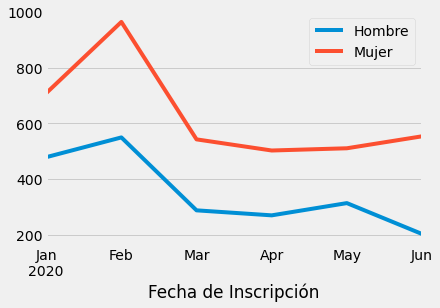

In [304]:
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in df_20_agrupado.reset_index().groupby('Género'):
    print(key)
    print(data)
    print("----")
    data.plot(x='Fecha de Inscripción', y='suma', ax=ax, label=key)

In [311]:
df_20.Distrito.value_counts()

Otro Municipio         887
Puente De Vallecas     575
Carabanchel            563
Villaverde             430
Latina                 341
Usera                  303
Ciudad Lineal          302
Tetuán                 270
Centro                 232
San Blas               231
Arganzuela             212
Vicálvaro              210
Fuencarral-el Pardo    199
Villa De Vallecas      174
Hortaleza              170
Moratalaz              146
Retiro                 140
Chamberí               125
Chamartín              109
Salamanca               95
Barajas                 82
Moncloa-aravaca         81
Name: Distrito, dtype: int64